In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

> # Importing data and creating dataframe

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


> # adding overweight column and BMI calculation

In [4]:
BMI = df['weight'] / ((df['height'] / 100) ** 2)


In [5]:
overweight = []
for i in BMI.values:
    if i > 25:
        overweight.append(1)
    else:
        overweight.append(0)
    
    
df['overweight'] = overweight


   

In [6]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


> # Normalize data by making 0 always good and 1 always bad.

## *first glucose with loop method*

In [7]:
df['cholesterol']

0        1
1        3
2        3
3        1
4        1
        ..
69995    1
69996    2
69997    3
69998    1
69999    2
Name: cholesterol, Length: 70000, dtype: int64

In [8]:
choles_list = []
for i in (df["cholesterol"]):
    if i == 1:
        choles_list.append(0)
    else:
        choles_list.append(1)

print(len(df), len(choles_list))
        

70000 70000


In [9]:
df['cholesterol'] = choles_list

## *glucose with .loc[] condition method*

In [10]:
df["gluc"]

0        1
1        1
2        1
3        1
4        1
        ..
69995    1
69996    2
69997    1
69998    2
69999    1
Name: gluc, Length: 70000, dtype: int64

In [11]:
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] != 0, 'gluc'] = 1

In [12]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


> # Drawing the Categorical Plot in the draw_cat_plot function.

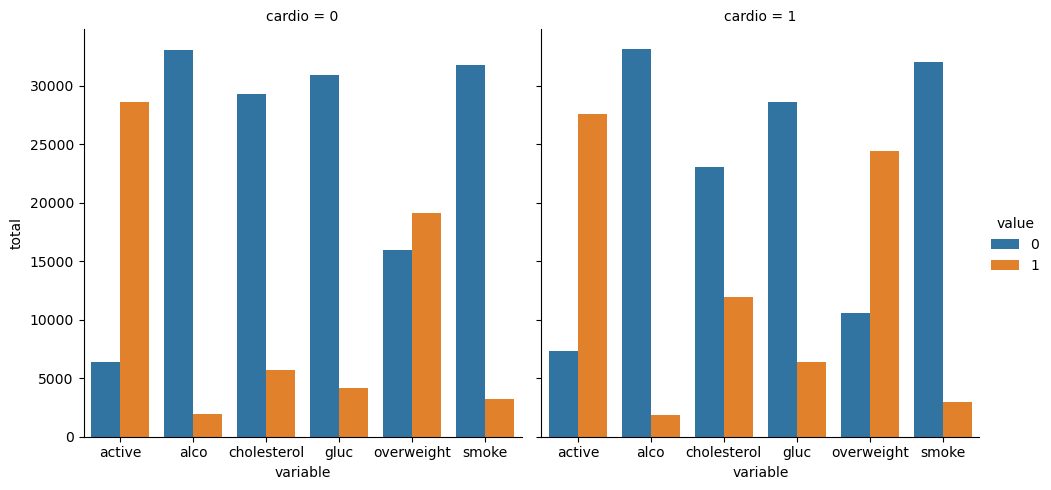

In [13]:
def draw_cat_plot(df):
    df_cat = df.melt(id_vars = ['cardio'] , value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    
    df_cat['total'] = 1
   
    
    
    df_cat = df_cat.groupby(['cardio' , 'variable', 'value'], as_index = False).count()
 
    
    
    sns.catplot(data = df_cat, x = 'variable', y = 'total', hue = 'value', kind = 'bar', col = 'cardio')
    


    plt.show()
    
   




draw_cat_plot(df) 

> # Draw the Heat Map in the draw_heat_map function.

In [14]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [15]:
df['height'].quantile(0.25)

159.0

In [16]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
          (df['height'] >= df['height'].quantile(0.025)) &
          (df['height'] <= df['height'].quantile(0.975)) &
          (df['weight'] >= df['weight'].quantile(0.025)) &
          (df['weight'] <= df['weight'].quantile(0.975))
]

In [17]:
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [18]:
corr = df_heat.corr()

In [19]:
mask = np.triu(np.ones_like(corr, dtype=bool))

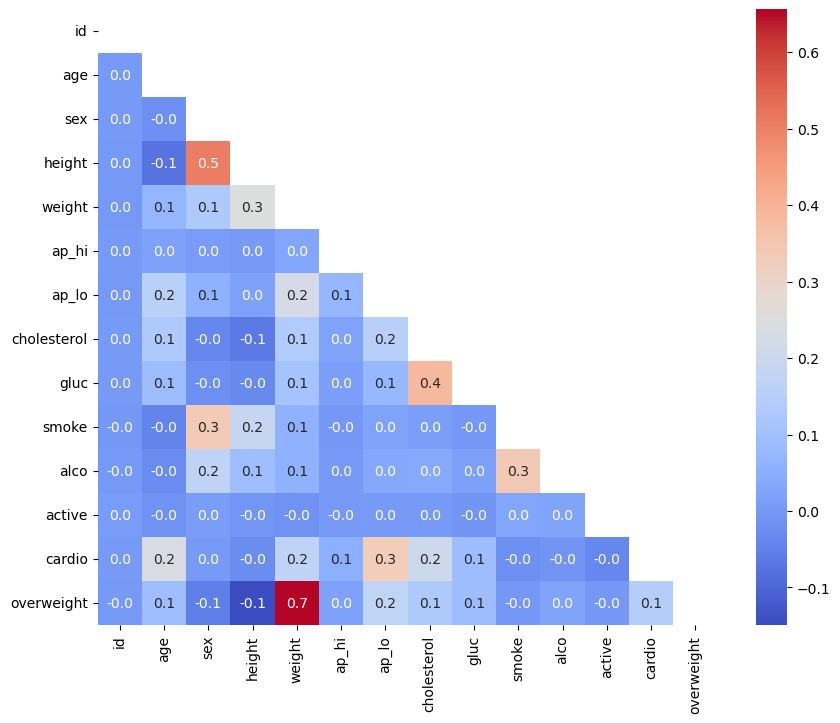

In [20]:
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm',fmt=".1f")
plt.show()